# EX 10
Develop vector auto regression model for multivariate time series data forecasting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from yfinance import download
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Step 1: Load Data (Google Stock Data from Yahoo Finance)
stock_data = download('GOOG', start='2010-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Step 2: Data Preprocessing
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
# Remove 'Adj Close' since it's causing the KeyError
stock_data = stock_data.dropna()

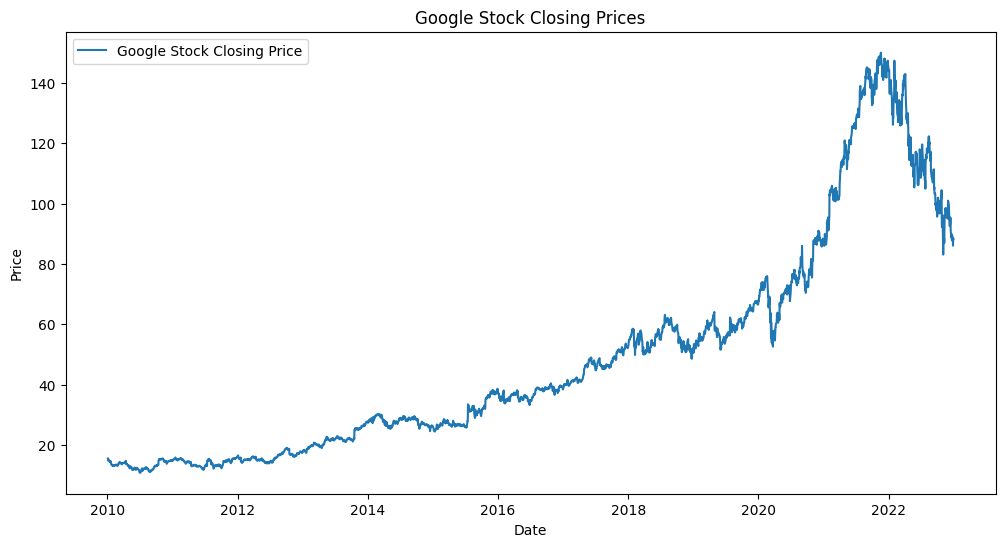

In [ ]:
# Visualize Stock Data (for example, closing prices)
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Google Stock Closing Price")
plt.title('Google Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:

# Step 3: Standardize the Data
scaler = StandardScaler()
stock_data_scaled = pd.DataFrame(scaler.fit_transform(stock_data), columns=stock_data.columns, index=stock_data.index)

In [ ]:
# Step 4: Train-Test Split
train_size = int(len(stock_data_scaled) * 0.8)
train, test = stock_data_scaled[:train_size], stock_data_scaled[train_size:]

In [ ]:
# Step 5: Determine the Optimal Lag Order using AIC
model = VAR(train)
lag_order = model.select_order().aic  # AIC criterion
print(f"Optimal Lag Order: {lag_order}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal Lag Order: 25


In [ ]:
# Step 6: Fit the VAR Model
model_fitted = model.fit(lag_order)


In [ ]:
# Step 7: Forecasting the Stock Data
forecast = model_fitted.forecast(train.values[-lag_order:], steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=stock_data.columns)


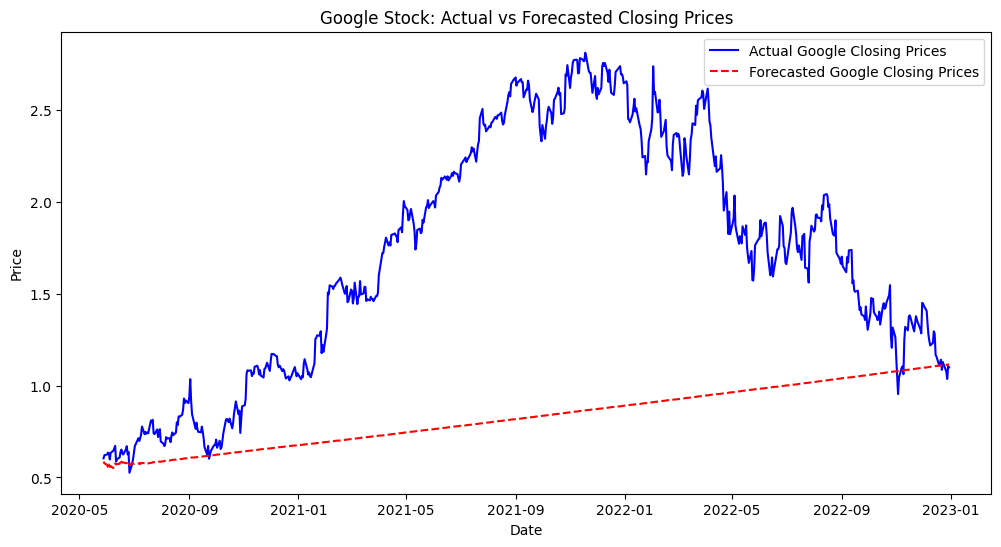

In [ ]:
# Step 8: Plot Actual vs Forecasted Stock Data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual Google Closing Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Close'], label='Forecasted Google Closing Prices', linestyle='--', color='red')
plt.title('Google Stock: Actual vs Forecasted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


In [ ]:
# Step 9: Calculate Evaluation Metrics (RMSE)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Close'], forecast_df['Close']))
print(f"RMSE for Google Stock Closing Prices: {rmse}")


RMSE for Google Stock Closing Prices: 1.0662518287559397


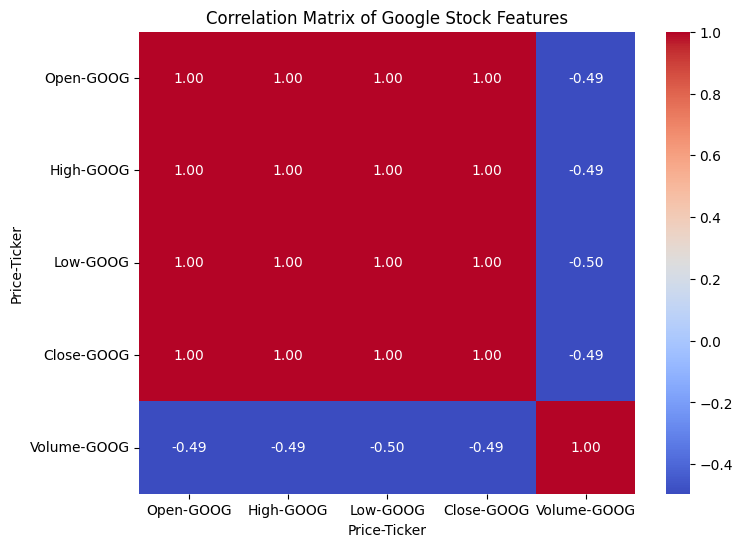

In [ ]:
# Step 10: Correlation Heatmap (Optional)
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Google Stock Features')
plt.show()


Optimized

In [ ]:
# 1. Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
# 2. Download multivariate stock data (Google + Amazon)
tickers = ['GOOG', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']
data.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


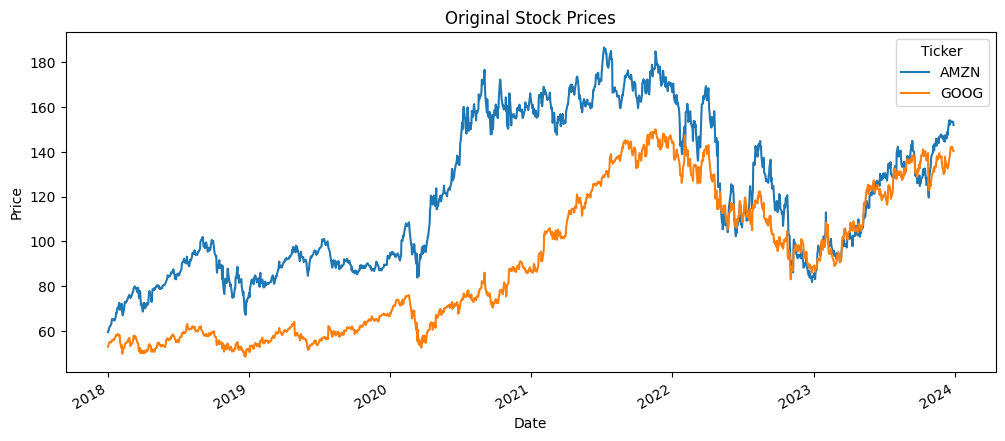

In [ ]:
# 3. Plot original time series
data.plot(figsize=(12, 5), title="Original Stock Prices")
plt.ylabel("Price")
plt.show()


In [ ]:
# 4. Make data stationary (differencing)
diff_data = data.diff().dropna()

In [ ]:
# Check stationarity using Augmented Dickey-Fuller test
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')
    print()
for col in diff_data.columns:
   adf_test(diff_data[col], col)


ADF Statistic for AMZN: -39.89923183773235
p-value: 0.0
Stationary

ADF Statistic for GOOG: -9.72221587123147
p-value: 9.477433259915728e-17
Stationary



In [ ]:
# 5. Fit the VAR model
model = VAR(diff_data)
model_fitted = model.fit(maxlags=15, ic='aic')
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Apr, 2025
Time:                     04:06:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.66568
Nobs:                     1508.00    HQIC:                   2.66125
Log likelihood:          -6282.12    FPE:                    14.2766
AIC:                      2.65862    Det(Omega_mle):         14.2577
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.061333         0.069254            0.886           0.376

Results for equation GOOG
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Define number of steps to forecast
n_obs = 10  # or any number based on how many future points you want

# Split data
train = diff_data[:-n_obs]
test = diff_data[-n_obs:]

# Fit the VAR model on train set
model = VAR(train)
model_fitted = model.fit(maxlags=5)  # You can also try 2 or 3

# Forecast
required_lags = model_fitted.k_ar

if len(train) >= required_lags:
    forecast_input = train.values[-required_lags:]
    forecast_diff = model_fitted.forecast(y=forecast_input, steps=n_obs)
    forecast_df = pd.DataFrame(forecast_diff, index=test.index, columns=test.columns)

    # Evaluate
    for col in test.columns:
        rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
        mae = mean_absolute_error(test[col], forecast_df[col])
        print(f" {col} — RMSE: {rmse:.4f}, MAE: {mae:.4f}")
else:
    print("Not enough data points for selected lag. Try reducing `maxlags`.")


 AMZN — RMSE: 1.6921, MAE: 1.2158
 GOOG — RMSE: 1.4203, MAE: 1.0765


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# 7. Convert forecasted differenced values to a DataFrame
forecast_df = pd.DataFrame(forecast_diff, index=pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='B')[1:], columns=diff_data.columns)


In [ ]:
# 8. Convert differenced forecast back to actual prices
last_actual = data.iloc[-1]
forecast_actual = forecast_df.cumsum() + last_actual

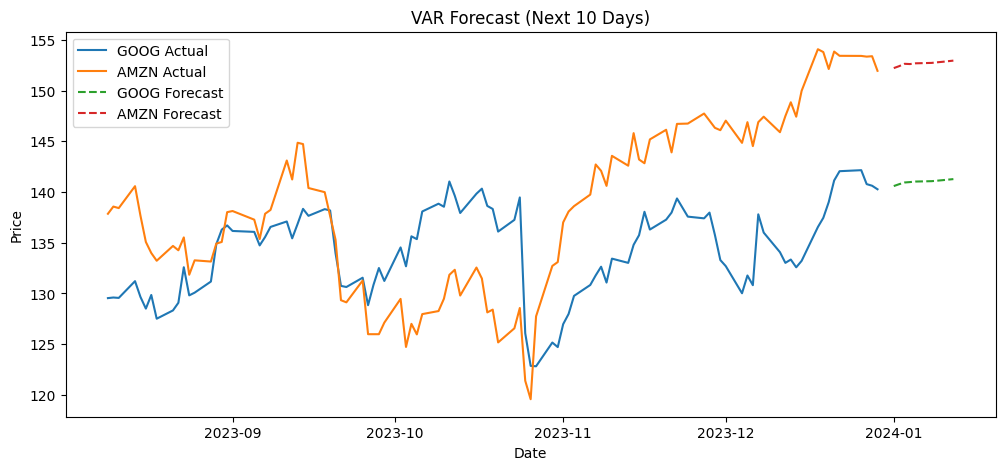

In [ ]:
# 9. Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(data['GOOG'].iloc[-100:], label='GOOG Actual')
plt.plot(data['AMZN'].iloc[-100:], label='AMZN Actual')
plt.plot(forecast_actual['GOOG'], label='GOOG Forecast', linestyle='--')
plt.plot(forecast_actual['AMZN'], label='AMZN Forecast', linestyle='--')
plt.title("VAR Forecast (Next 10 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
# 2. Download multivariate stock data (Google + Amazon)
tickers = ['GOOG', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']
data.dropna(inplace=True)


[*********************100%***********************]  2 of 2 completed


In [ ]:
# Split data
n_obs = 10  # or any number based on how many future points you want
train_data = data[:-n_obs]
test_data = data[-n_obs:]

In [ ]:
# 4. Make data stationary (differencing) - on the train data
diff_data = train_data.diff().dropna()


In [ ]:
# Check stationarity using Augmented Dickey-Fuller test
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')
    print()

for col in diff_data.columns:
    adf_test(diff_data[col], col)

ADF Statistic for AMZN: -39.777056883009415
p-value: 0.0
Stationary

ADF Statistic for GOOG: -9.689947299142991
p-value: 1.1435752542646499e-16
Stationary



In [ ]:
# 5. Fit the VAR model on the differenced training data
model = VAR(diff_data)
model_fitted = model.fit(maxlags=5, ic='aic') # Reduced maxlags to 5
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Apr, 2025
Time:                     04:13:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.67163
Nobs:                     1498.00    HQIC:                   2.66718
Log likelihood:          -6244.88    FPE:                    14.3613
AIC:                      2.66453    Det(Omega_mle):         14.3421
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.058725         0.069617            0.844           0.399

Results for equation GOOG
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# 5. Fit the VAR model on the differenced training data
model = VAR(diff_data)
# Try increasing the maxlags parameter to give the model more data to work with:
model_fitted = model.fit(maxlags=10, ic='aic') # Increased maxlags to 10

print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Apr, 2025
Time:                     04:14:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.67163
Nobs:                     1498.00    HQIC:                   2.66718
Log likelihood:          -6244.88    FPE:                    14.3613
AIC:                      2.66453    Det(Omega_mle):         14.3421
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.058725         0.069617            0.844           0.399

Results for equation GOOG
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Check the model coefficients
print(model_fitted.params)

# Check the forecast input shape
print(forecast_input.shape)

# Ensure that forecast_input is not empty
if forecast_input.shape[0] > 0:
    forecast_diff = model_fitted.forecast(y=forecast_input, steps=forecast_steps)
else:
    print("Forecast input is empty!")


In [ ]:
# 7. Convert forecasted differenced values to a DataFrame
forecast_df = pd.DataFrame(forecast_diff, index=pd.date_range(start=train_data.index[-1], periods=forecast_steps+1, freq='B')[1:], columns=diff_data.columns)


In [ ]:
# 8. Convert differenced forecast back to actual prices
last_actual = train_data.iloc[-1]
forecast_actual = forecast_df.cumsum() + last_actual

In [ ]:
# 9. Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(data['GOOG'].iloc[-100:], label='GOOG Actual')
plt.plot(data['AMZN'].iloc[-100:], label='AMZN Actual')
plt.plot(forecast_actual['GOOG'], label='GOOG Forecast', linestyle='--')
plt.plot(forecast_actual['AMZN'], label='AMZN Forecast', linestyle='--')
plt.title("VAR Forecast (Next 10 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# 10. Compare forecast vs actual (only if actual future data is available)
rmse_goog = np.sqrt(mean_squared_error(test_data['GOOG'], forecast_actual['GOOG']))
mae_goog = mean_absolute_error(test_data['GOOG'], forecast_actual['GOOG'])
rmse_amzn = np.sqrt(mean_squared_error(test_data['AMZN'], forecast_actual['AMZN']))
mae_amzn = mean_absolute_error(test_data['AMZN'], forecast_actual['AMZN'])

print(f"GOOG — RMSE: {rmse_goog:.4f}, MAE: {mae_goog:.4f}")
print(f"AMZN — RMSE: {rmse_amzn:.4f}, MAE: {mae_amzn:.4f}")